In [2]:
import pandas
import matplotlib.pyplot as plt
import pickle
import wntr
from testWN import testWN as twm
import numpy as np
import pandas as pd

In [3]:
%matplotlib notebook

# Water Network

In [10]:
#inp_file = '../Networks/BWCNdata/c-town_true_network.inp'
inp_file = '../Code/c-town_true_network_simplified_controls.inp'

ctown = twm(inp_file)

/Applications/anaconda3/lib/python3.7/site-packages/wntr/epanet/io.py:2085: UserWarning: Not all curves were used in "../Code/c-town_true_network_simplified_controls.inp"; added with type None, units conversion left to user
  warnings.warn('Not all curves were used in "{}"; added with type None, units conversion left to user'.format(self.wn.name))


Get network information:

In [11]:
nodes = ctown.getNodeName()
links = ctown.getLinkName()
pump_df = pd.DataFrame(np.ones(len(links[0])).reshape(1,-1), columns=links[0])
valves_df = pd.DataFrame(np.ones(len(links[2])).reshape(1,-1), columns=links[2])

In [12]:
pump_df.keys()

Index(['PU2', 'PU5', 'PU6', 'PU8', 'PU10'], dtype='object')

<IPython.core.display.Javascript object>


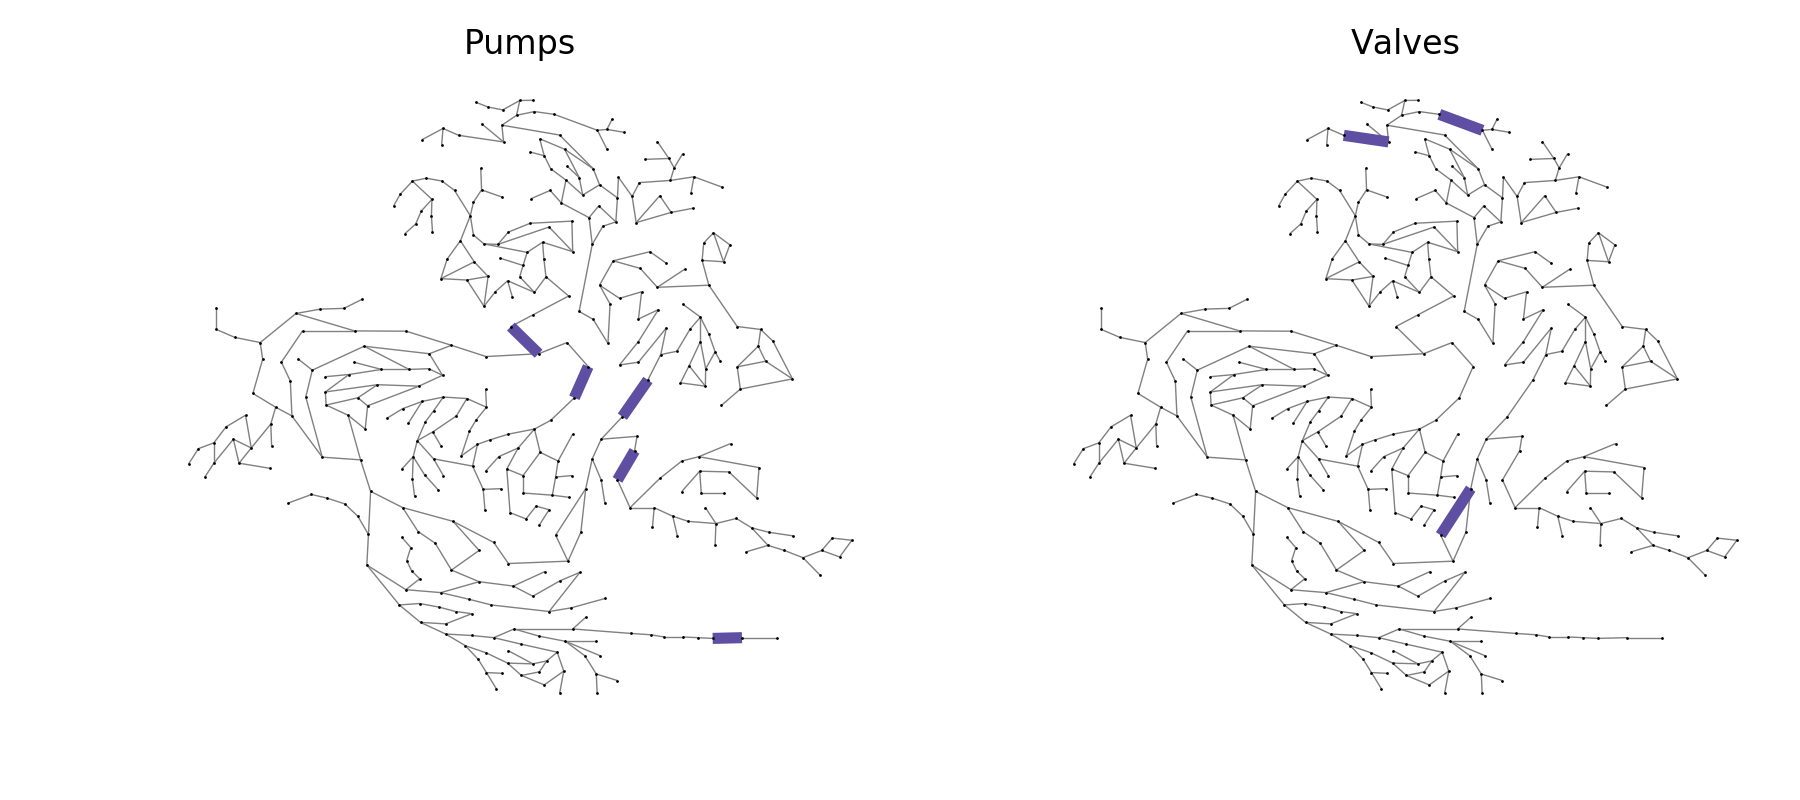

/Applications/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


In [13]:
fig_nw, ax_nw = plt.subplots(1,2, figsize=(9,4))
wntr.graphics.plot_network(ctown.wn, link_attribute=pump_df.loc[0],node_size=1, link_width=4, add_colorbar=False, title='Pumps', ax=ax_nw[0])#, link_labels=False,node_labels=True)
wntr.graphics.plot_network(ctown.wn, link_attribute=valves_df.loc[0],node_size=1, link_width=4, add_colorbar=False, title='Valves', ax=ax_nw[1])
fig_nw.tight_layout()

# Results

In [14]:
#with open('results.pkl', 'rb') as f:
with open('results_sim.pkl', 'rb') as f:
    results=pickle.load(f)

In [15]:
results.node.keys()

dict_keys(['demand', 'head', 'pressure', 'quality'])

# Plotting

## Nodes

In [16]:
toPlotNames = ctown.getNodeName()

<IPython.core.display.Javascript object>


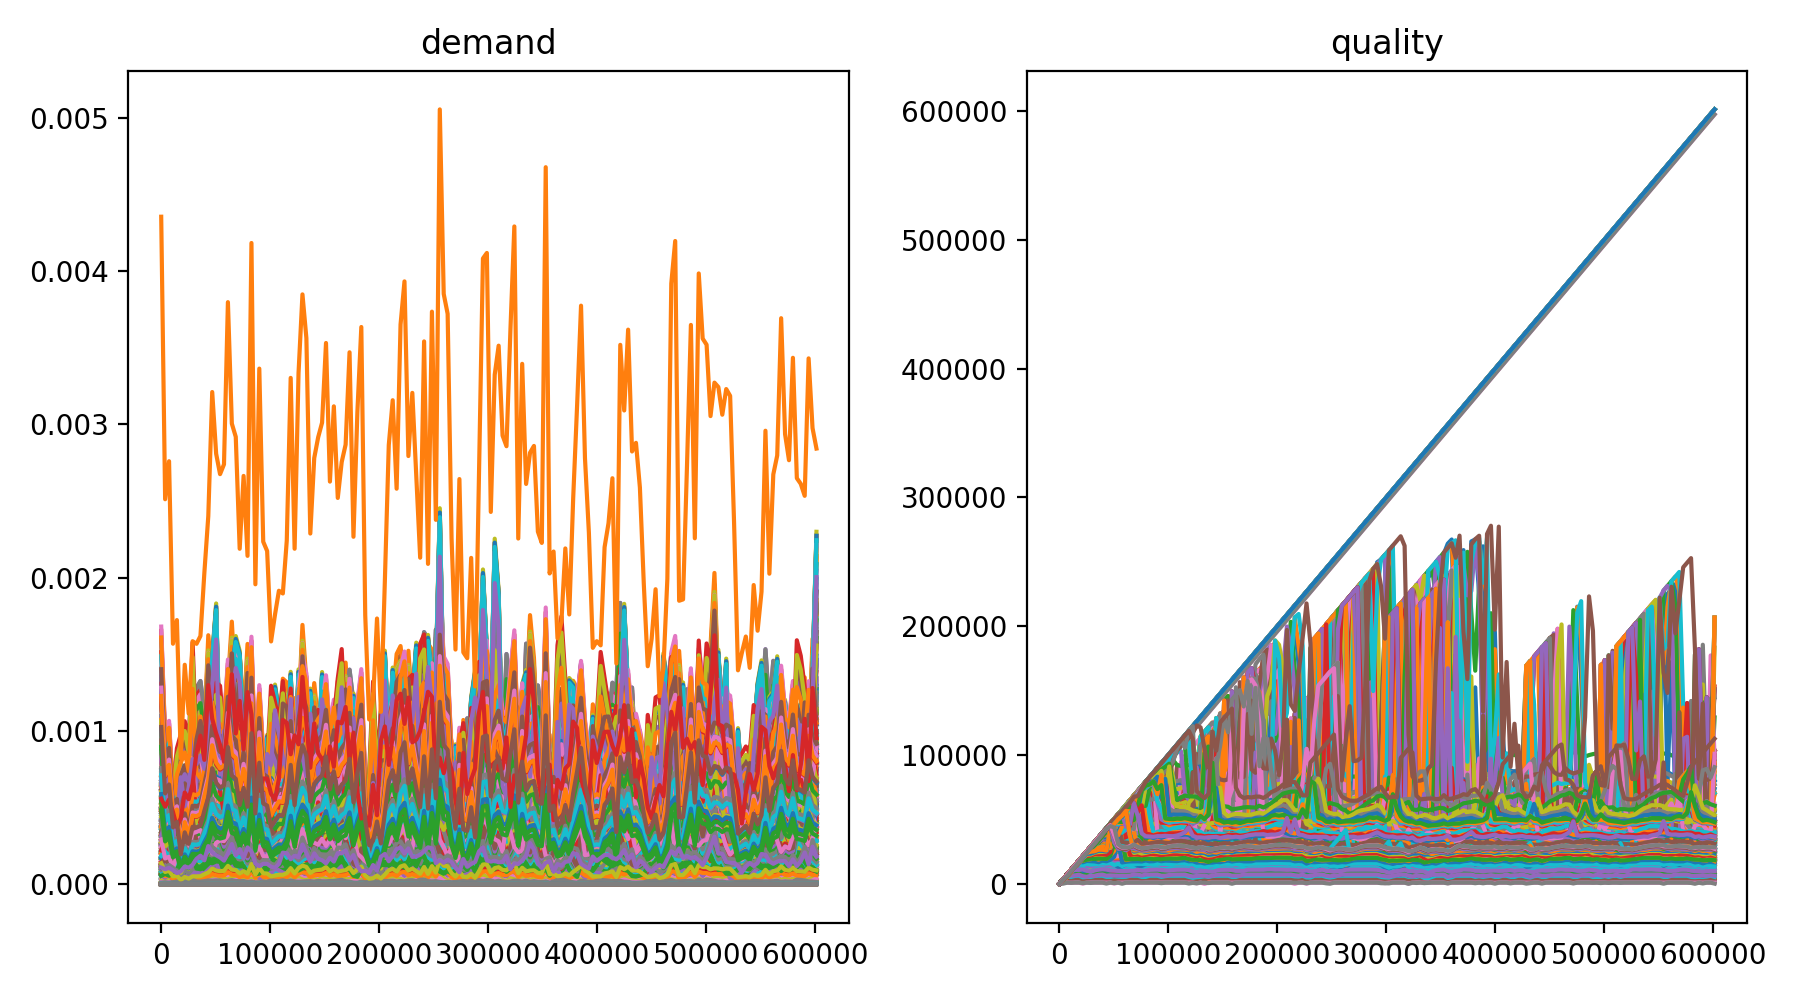

In [17]:
fig_1, ax_1 = plt.subplots(1,2, figsize=(9,5))
demand = results.node['demand'][toPlotNames[2]] # Junctions
quality = results.node['quality'][toPlotNames[2]] # Junctions
ax_1[0].plot(demand)
ax_1[0].set_title('demand')
ax_1[1].plot(quality)
ax_1[1].set_title('quality')
fig_1.tight_layout()



<IPython.core.display.Javascript object>


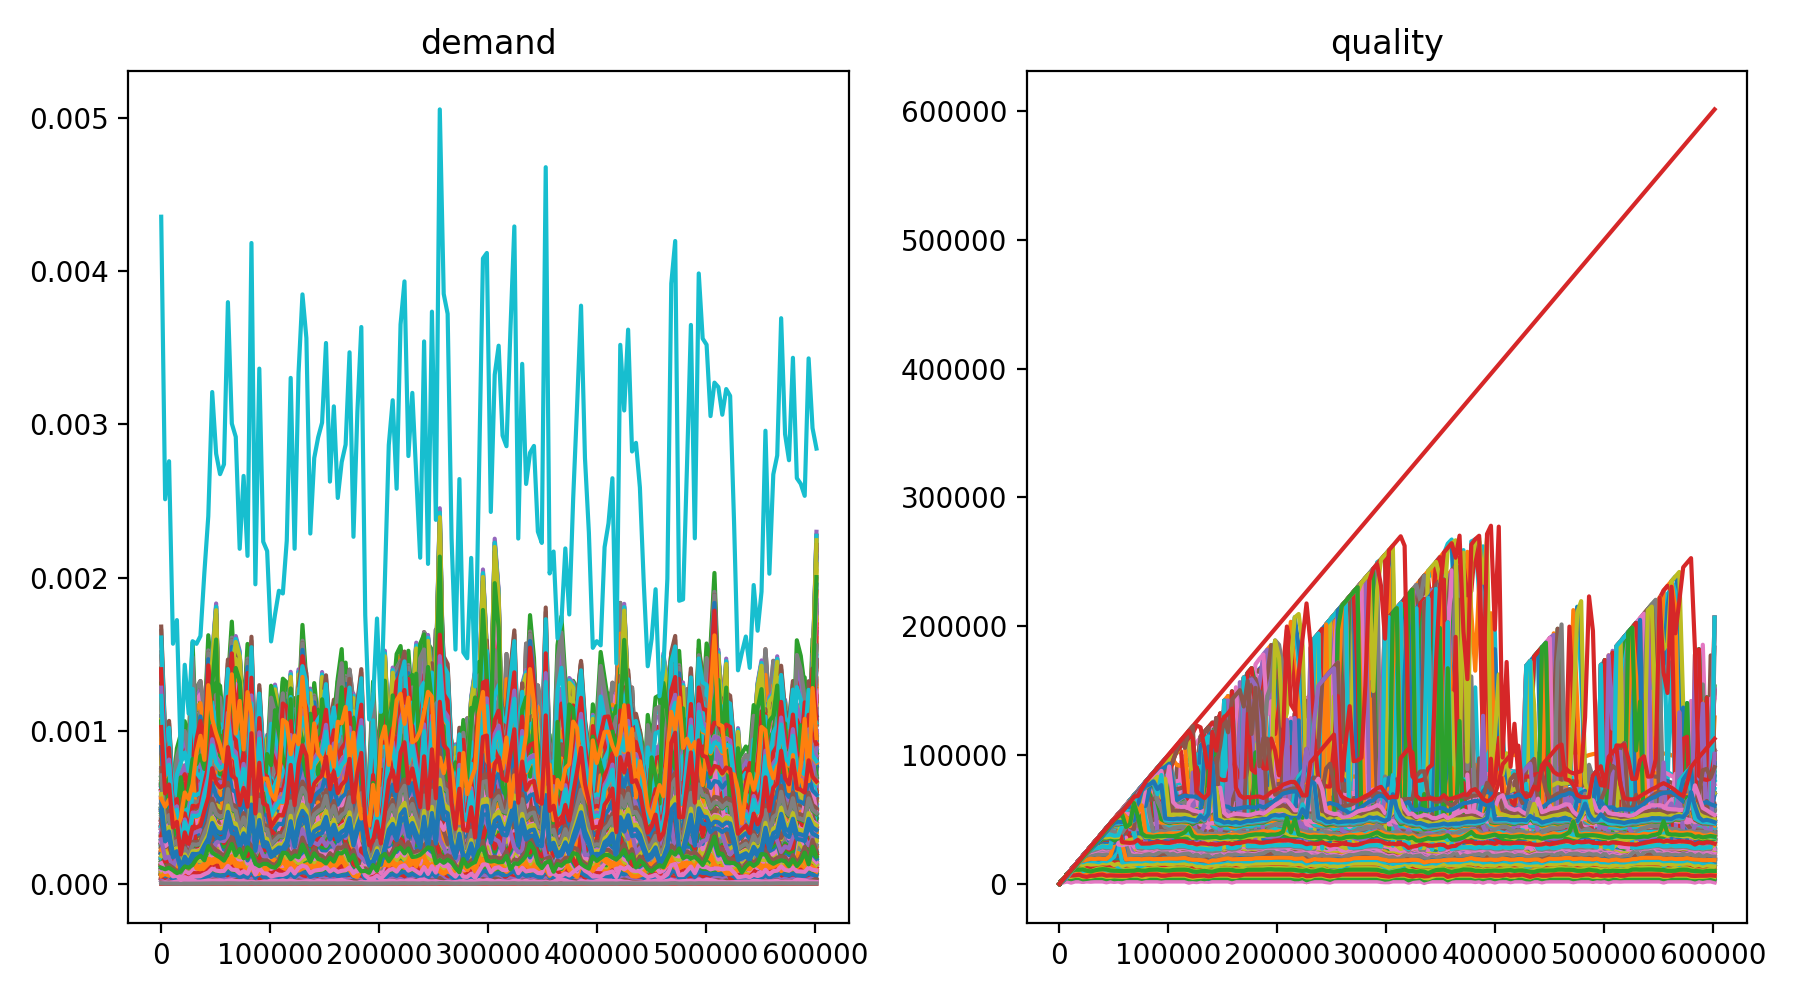

In [20]:
# Same plot, but for only nodes with positive demands
fig_1, ax_1 = plt.subplots(1,2, figsize=(9,5))
demand = results.node['demand'][toPlotNames[2]] # Junctions
quality = results.node['quality'][toPlotNames[2]] # Junctions
position = demand.sum(axis=0) > 0
posdemand = demand.loc[:, position==True]
posquality = quality.loc[:, position==True]
ax_1[0].plot(posdemand)
ax_1[0].set_title('demand')
ax_1[1].plot(posquality)
ax_1[1].set_title('quality')
fig_1.tight_layout()

<IPython.core.display.Javascript object>


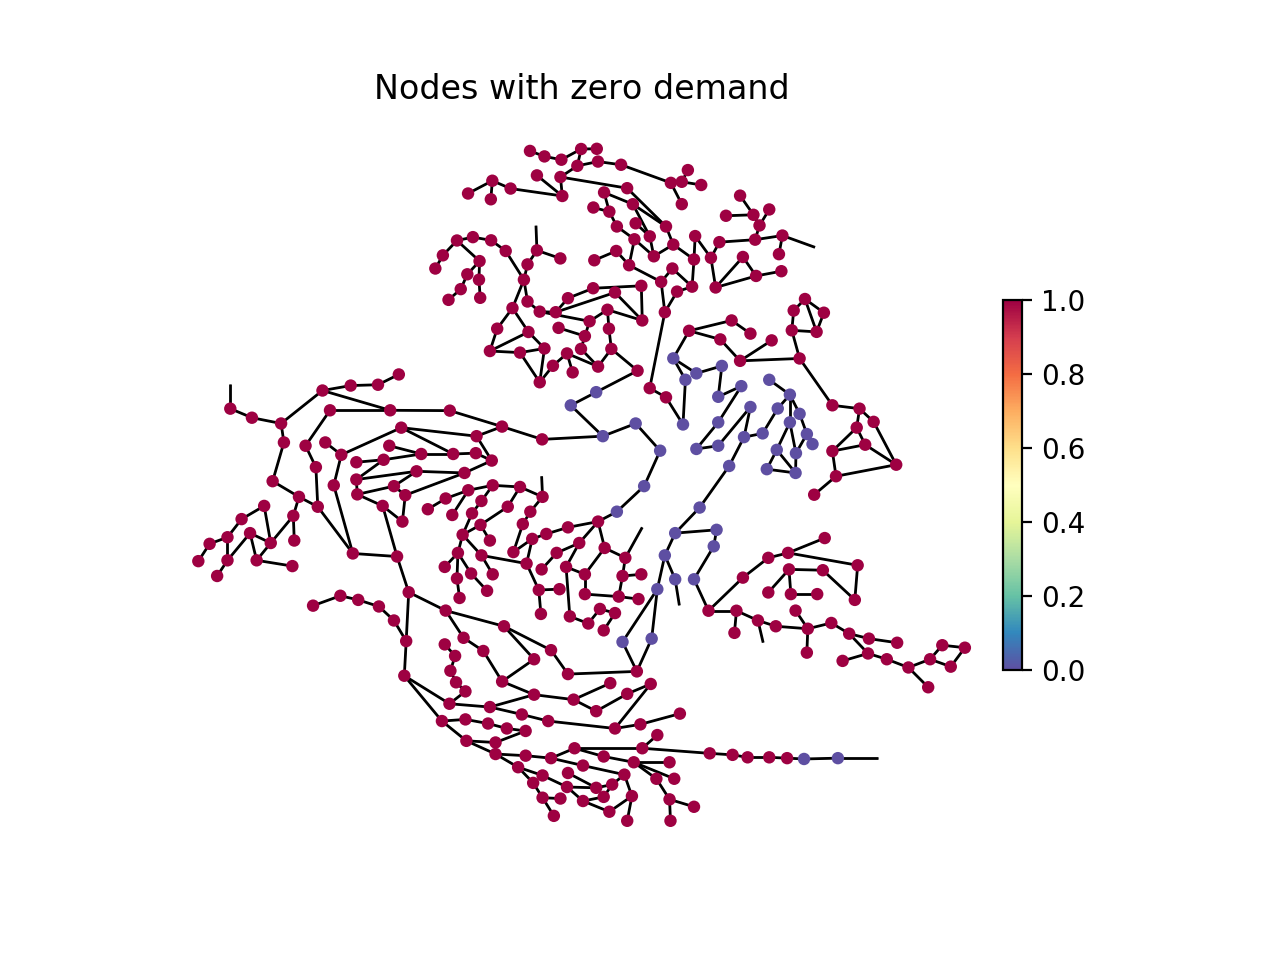

(<matplotlib.collections.PathCollection at 0x101e78ff98>,
 <matplotlib.collections.LineCollection at 0x101e799278>)

In [21]:
wntr.graphics.plot_network(ctown.wn, node_attribute=position, title='Nodes with zero demand')

<IPython.core.display.Javascript object>


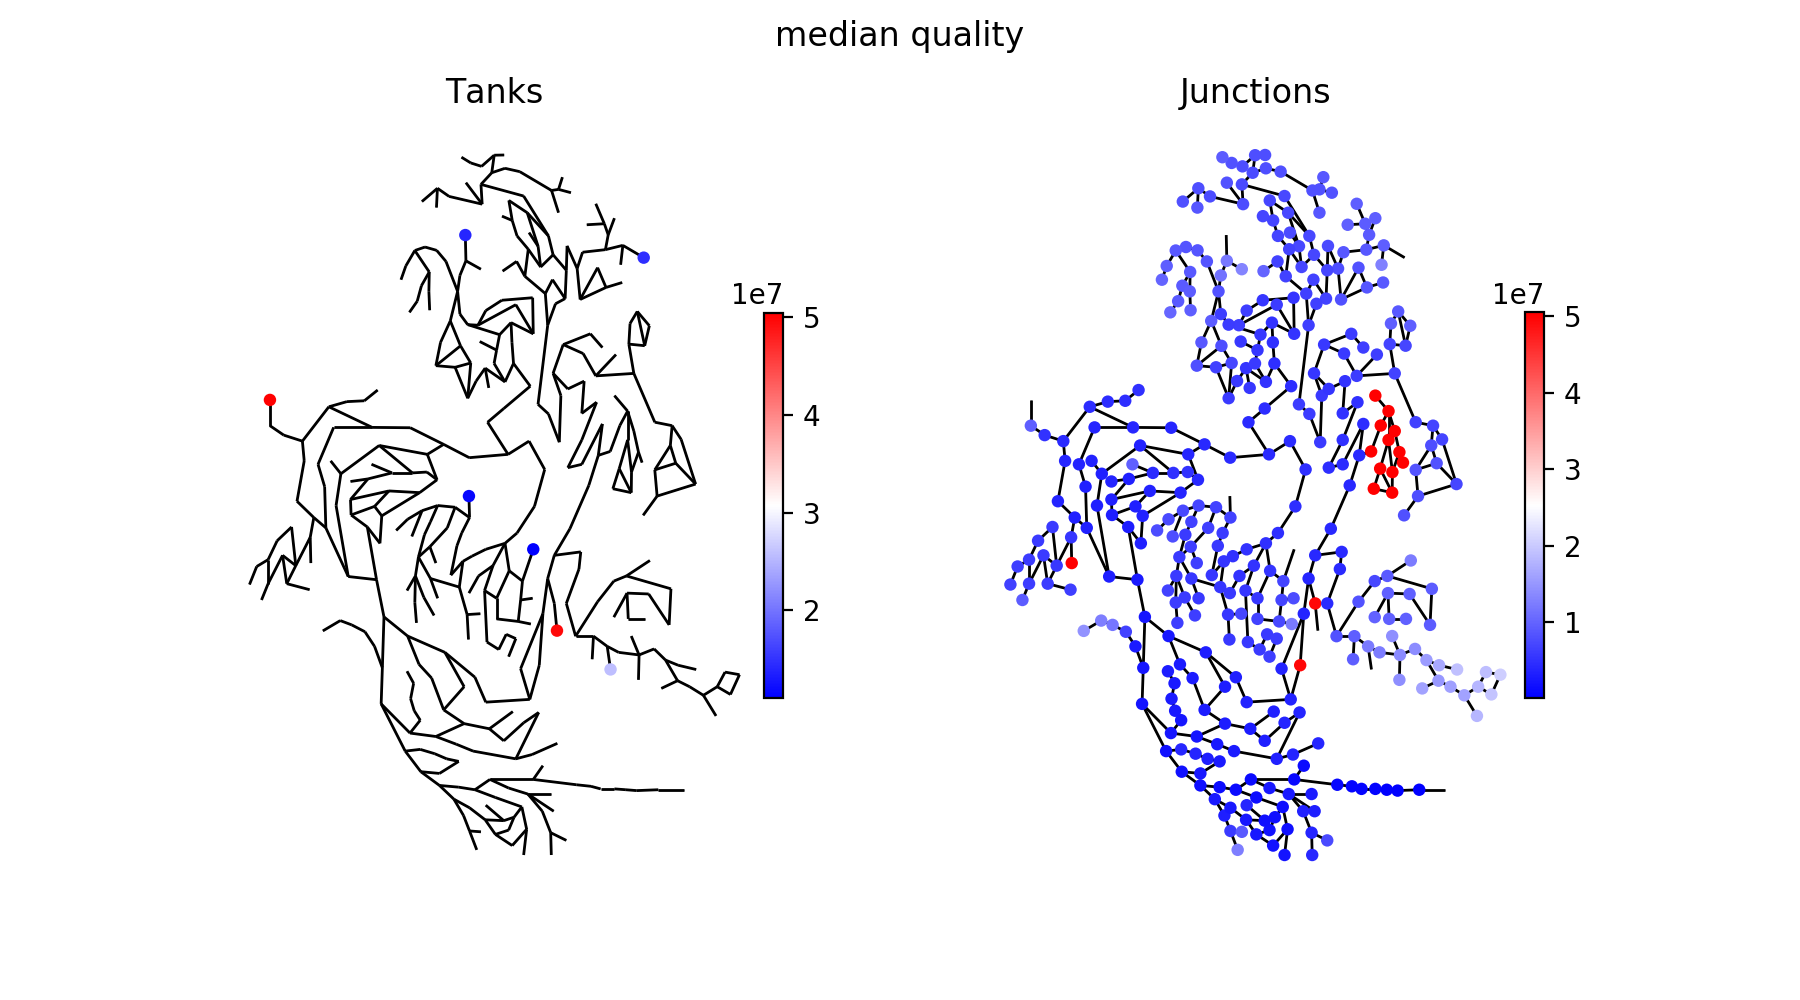

(<matplotlib.collections.PathCollection at 0x101e6427f0>,
 <matplotlib.collections.LineCollection at 0x101e642a90>)

In [22]:
fig_2, ax_2 = plt.subplots(1,2, figsize=(9,5))
fig_2.suptitle('median quality', fontsize=12)
df = results.node['quality']
df_med = df.sum()

wntr.graphics.plot_network(ctown.wn, node_attribute=df_med[toPlotNames[0]], node_cmap='bwr', title='Tanks', ax=ax_2[0])  # tanks
wntr.graphics.plot_network(ctown.wn, node_attribute=df_med[toPlotNames[2]], node_cmap='bwr', title='Junctions', ax=ax_2[1])  # junctions

<function dict.values>

<IPython.core.display.Javascript object>


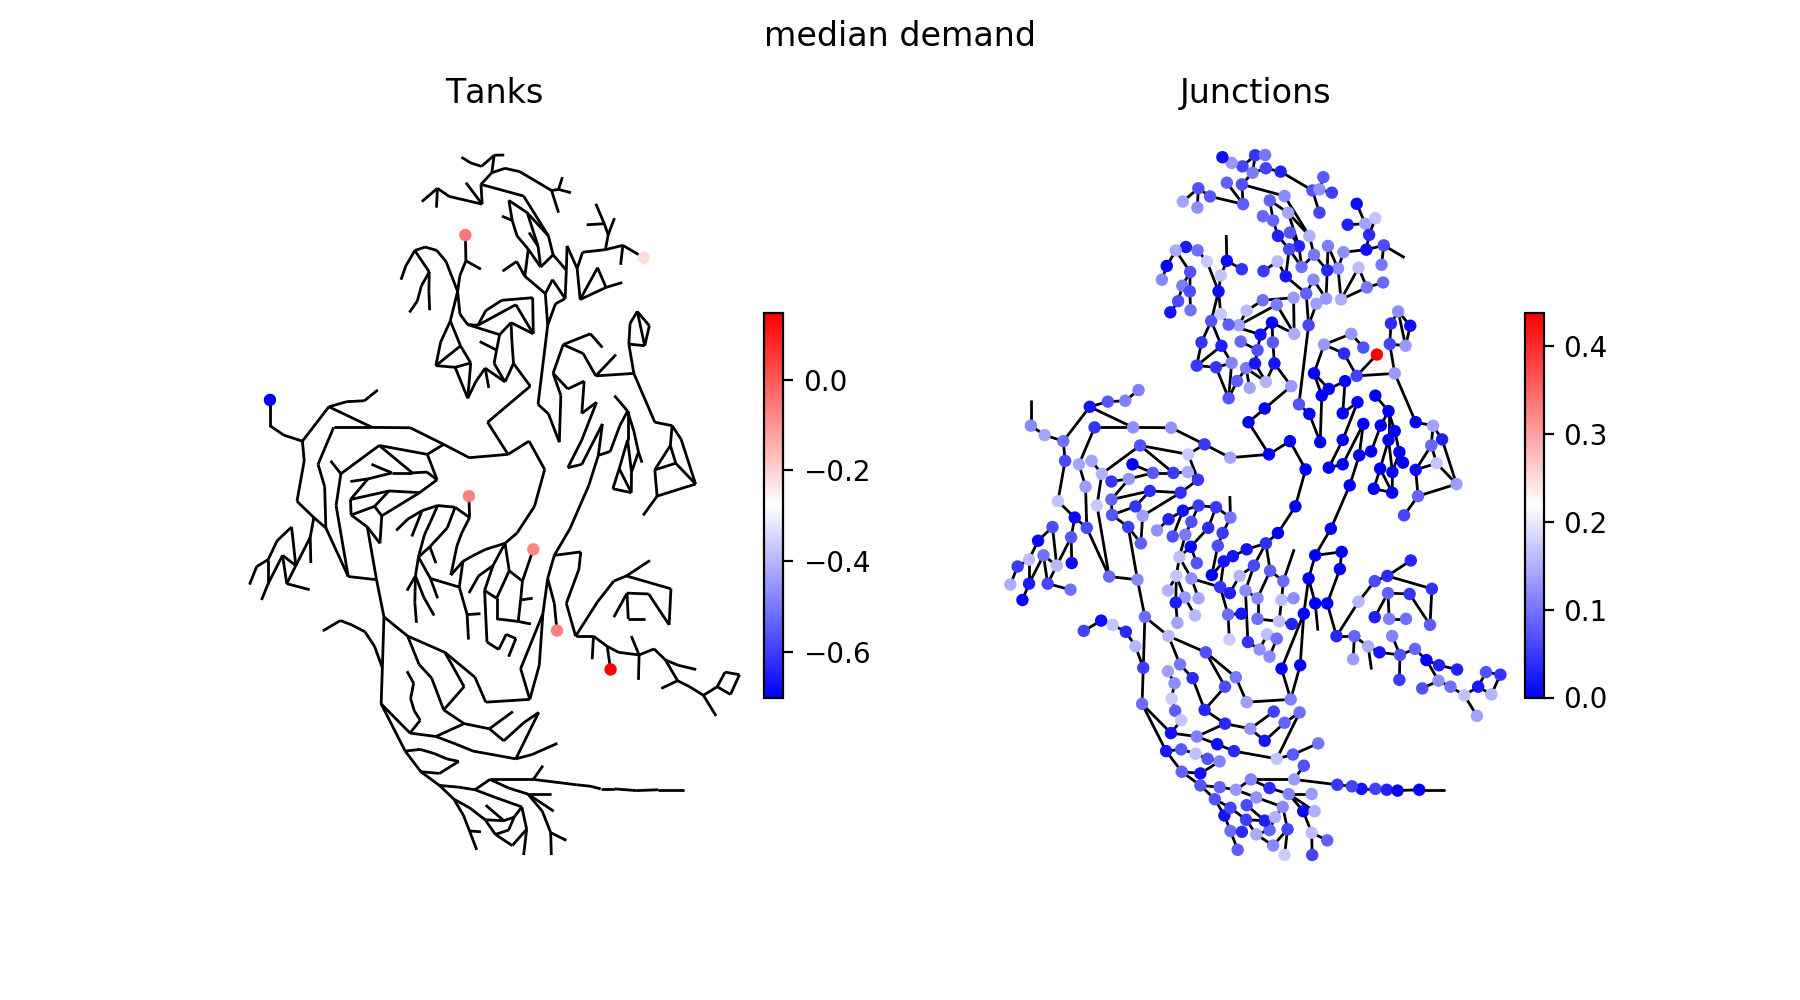

(<matplotlib.collections.PathCollection at 0x101eae16d8>,
 <matplotlib.collections.LineCollection at 0x101eae1978>)

In [23]:
fig_2, ax_2 = plt.subplots(1,2, figsize=(9,5))
fig_2.suptitle('median demand', fontsize=12)
df = results.node['demand']
df_med = df.sum()

wntr.graphics.plot_network(ctown.wn, node_attribute=df_med[toPlotNames[0]], node_cmap='bwr', title='Tanks', ax=ax_2[0])  # tanks
wntr.graphics.plot_network(ctown.wn, node_attribute=df_med[toPlotNames[2]], node_cmap='bwr', title='Junctions', ax=ax_2[1])  # junctions

<IPython.core.display.Javascript object>


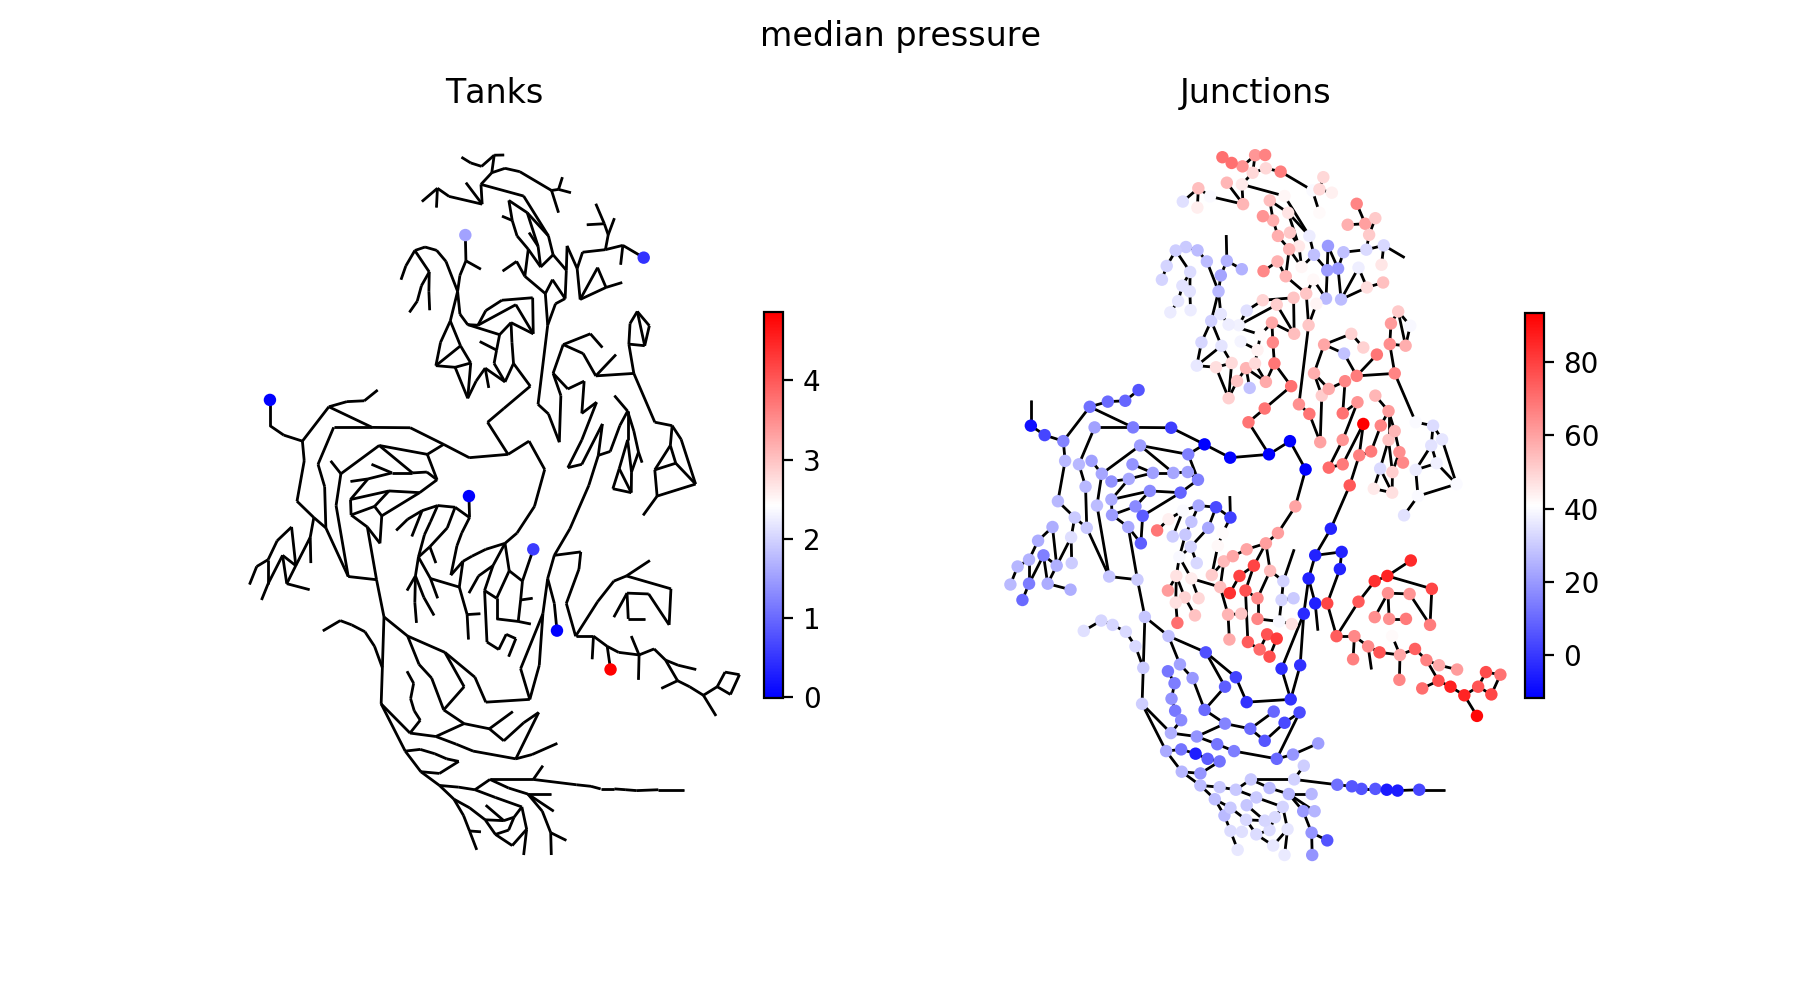

(<matplotlib.collections.PathCollection at 0x1020b89748>,
 <matplotlib.collections.LineCollection at 0x1020b899e8>)

In [24]:
fig_3, ax_3 = plt.subplots(1,2, figsize=(9,5))
fig_3.suptitle('median pressure', fontsize=12)
df = results.node['pressure']
df_med = df.median()

wntr.graphics.plot_network(ctown.wn, node_attribute=df_med[toPlotNames[0]], node_cmap='bwr', title='Tanks', ax=ax_3[0])  # tanks
wntr.graphics.plot_network(ctown.wn, node_attribute=df_med[toPlotNames[2]], node_cmap='bwr', title='Junctions', ax=ax_3[1])  # junctions

## Links

In [25]:
results.link.keys()

dict_keys(['linkquality', 'flowrate', 'headloss', 'velocity', 'status', 'setting', 'frictionfact', 'rxnrate'])

### Pump 6

<IPython.core.display.Javascript object>


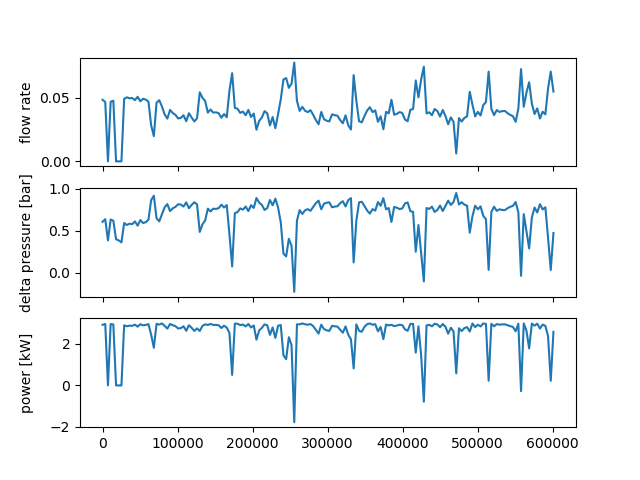

In [23]:
fig_4, ax_4 = plt.subplots(3,1, sharex=True)
v_6 = results.link['flowrate']['PU6']
dp_6 = (results.node['pressure']['J415']-results.node['pressure']['J289'])*1000
p_6 = v_6*dp_6
ax_4[0].plot(v_6)
ax_4[0].set_ylabel('flow rate')
ax_4[1].plot(dp_6/1e5)
ax_4[1].set_ylabel('delta pressure [bar]')
ax_4[2].plot(p_6/1000)
ax_4[2].set_ylabel('power [kW]')

fig_4.align_labels()

### Valve 45

<IPython.core.display.Javascript object>


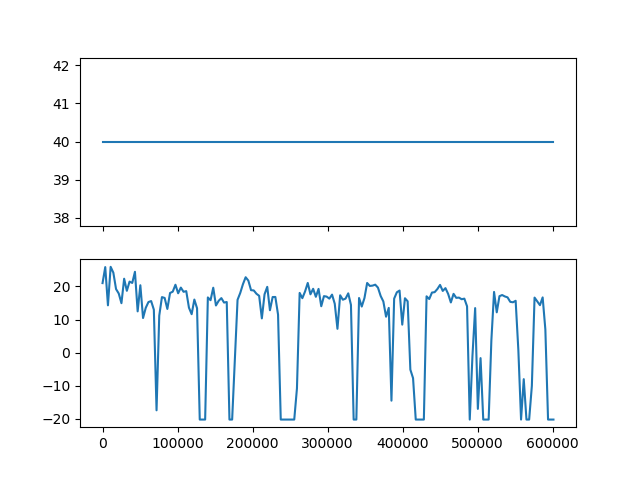

In [24]:
fig_5, ax_5 = plt.subplots(2,1, sharex=True)
ax_5[0].plot(results.link['setting']['V45'])
ax_5[1].plot(results.node['pressure']['J253']-results.node['pressure']['J130'])